In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dynasty=pd.read_csv('Dynasty.csv')

In [131]:
dynasty.head()

,Rank,Player,Team,Year,Pos,AGE,Round,Rookie,Fantasy Points,ADP,Rd_drafted,#1,#2,#3,#4,#5,#6
0,1,AJ Green,CIN,2014,WR,25,1,No,257.6,2.5,1,4,3,1,4,2,1
1,2,Calvin Johnson,DET,2014,WR,28,1,No,261.2,2.7,1,2,6,2,2,1,3
2,3,LeSean McCoy,PHI,2014,RB,25,2,No,304.6,2.8,1,1,1,4,1,5,5
3,4,Dez Bryant,DAL,2014,WR,25,1,No,245.9,4.5,1,6,7,6,3,3,2
4,5,Demaryius Thomas,DEN,2014,WR,26,1,No,273.0,5.5,1,5,5,3,5,8,7


In [3]:
dynasty.info

<bound method DataFrame.info of       Rank                 Player  Team  Year Pos  AGE      Round Rookie  \
0        1               AJ Green   CIN  2014  WR   25          1     No   
1        2         Calvin Johnson   DET  2014  WR   28          1     No   
2        3           LeSean McCoy   PHI  2014  RB   25          2     No   
3        4             Dez Bryant   DAL  2014  WR   25          1     No   
4        5       Demaryius Thomas   DEN  2014  WR   26          1     No   
...    ...                    ...   ...   ...  ..  ...        ...    ...   
1856   274          Jalen Richard   LVR  2020  RB   26  Undrafted     No   
1857   275         Kahale Warring   HOU  2020  TE   23          3     No   
1858   276  Equanimeous St. Brown   GBP  2020  WR   23          6     No   
1859   277             Dan Arnold   ARI  2020  TE   25  Undrafted     No   
1860   278            Josh Gordon   SEA  2020  WR   29          2     No   

      Fantasy Points     ADP   #1   #2   #3   #4   #5  

In [4]:
dynasty.shape

(1861, 16)

In [5]:
dynasty.describe()

,Rank,Year,AGE,Fantasy Points,ADP,#1,#2,#3,#4,#5,#6
count,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000
mean,133.649113,2017.076303,25.372918,105.827007,132.900161,132.873186,132.824288,132.974207,132.853842,132.957012,132.909189
std,77.144996,1.995312,3.696932,91.396768,74.252769,75.646127,75.547662,75.734613,75.612795,75.716664,75.640923
min,1.000000,2014.000000,0.000000,-2.300000,1.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,67.000000,2015.000000,23.000000,11.100000,69.170000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
50%,133.000000,2017.000000,25.000000,98.300000,134.830000,133.000000,133.000000,134.000000,133.000000,133.000000,133.000000
75%,200.000000,2019.000000,27.000000,166.700000,202.830000,202.000000,201.000000,202.000000,201.000000,202.000000,202.000000
max,278.000000,2020.000000,42.000000,415.680000,240.830000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000


In [2]:
dynasty.dtypes

Rank                int64
Player             object
Team               object
Year                int64
Pos                object
AGE                 int64
Round              object
Rookie             object
Fantasy Points    float64
ADP               float64
#1                  int64
#2                  int64
#3                  int64
#4                  int64
#5                  int64
#6                  int64
dtype: object

In [8]:
dynasty['Rookie'].value_counts()

No     1524
Yes     336
Name: Rookie, dtype: int64

In [9]:
dynasty['Rookie'][dynasty['Rookie']=='N0']=='No'

Series([], Name: Rookie, dtype: bool)

In [10]:
dynasty['Rookie'][dynasty['Rookie']=='Ni']

Series([], Name: Rookie, dtype: object)

In [11]:
dynasty['Rookie'][dynasty['Rookie']=='yes']

Series([], Name: Rookie, dtype: object)

In [12]:
dynasty.at[908,'Rookie']='No'
dynasty.at[948,'Rookie']='No'
dynasty.at[1252,'Rookie']='Yes'

In [11]:
dynasty['Rookie'].value_counts()

No     1524
Yes     336
Name: Rookie, dtype: int64

In [2]:
#Makes Rookies into categorical 1=Vet, 0=Rookie
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)

dynasty['Rookie']=ohe.fit_transform(dynasty[['Rookie']])
 
dynasty[dynasty['Rookie']==1]

dynasty['Rookie'].value_counts()


1.0    1525
0.0     336
Name: Rookie, dtype: int64

In [20]:
dynasty.isna().sum()

Rank              0
Player            0
Team              4
Year              0
Pos               0
AGE               0
Round             0
Rookie            0
Fantasy Points    0
ADP               0
#1                0
#2                0
#3                0
#4                0
#5                0
#6                0
dtype: int64

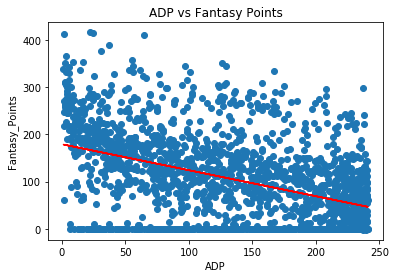

In [49]:
#Plots ADP vs Fanatsy point to visualize any correlation
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

ADP=dynasty.iloc[:,9]
Fantasy_Points=dynasty.iloc[:,8]
ADP=ADP.values.reshape(-1,1)
Fantasy_Points=Fantasy_Points.values.reshape(-1,1)
lm.fit(ADP,Fantasy_Points)

Fantasy_Pred=lm.predict(ADP)

plt.scatter(ADP,Fantasy_Points)
plt.plot(ADP,Fantasy_Pred,color='red')
plt.xlabel('ADP')
plt.ylabel('Fantasy_Points')
plt.title('ADP vs Fantasy Points')
plt.show()





Text(0.5, 1, 'ADP vs Fantasy Points')

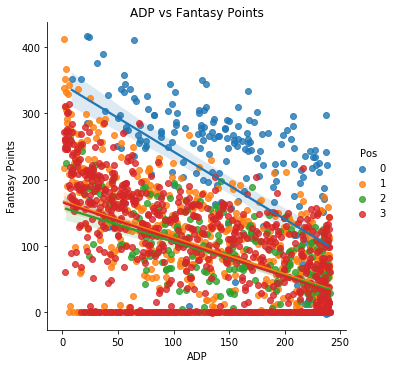

In [98]:
import seaborn as sns
#Plots adp vs fantasy point by position
sns.lmplot(x='ADP',y='Fantasy Points',hue='Pos',data=dynasty)
plt.title('ADP vs Fantasy Points')

Text(0.5, 1, 'AGE vs ADP')

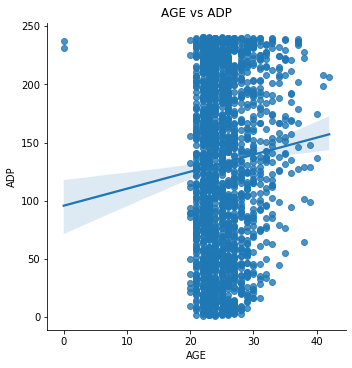

In [99]:
#Plots Age vs ADP to visualize any correlation
sns.lmplot(x='AGE',y='ADP',data=dynasty)
plt.title('AGE vs ADP')

In [239]:
#Removes Rookies from data set
vets=dynasty[dynasty['Rookie']==1]
vets.groupby(['Round','Pos'])['Fantasy Points'].mean()



Round  Pos
0      0      220.623511
       1      162.436410
       2       94.267568
       3      138.091304
1      0      211.086000
       1      137.642439
       2       93.535088
       3      125.315270
2      0      238.801818
       1      129.237922
       2       99.332727
       3      119.336346
3      0      231.814545
       1      103.625429
       2       74.030435
       3       84.797209
4      1       99.153846
       2       84.280000
       3      113.485128
5      0      227.116667
       1       97.521212
       2       96.800000
       3      134.582857
6      0        0.000000
       1       99.588889
       2       16.700000
       3       55.320000
7      0      200.440000
       1      101.583544
       2       85.512000
       3      101.024255
Name: Fantasy Points, dtype: float64

In [240]:
#Gets average points by round by position
avg_points=pd.DataFrame(vets.groupby(['Pos','Rd_drafted'])['Fantasy Points'].mean())

avg_points.reset_index()

avg_points.to_csv('AveragePoints_Round.csv')

In [5]:
dynasty[dynasty['Rookie']==1.0].groupby(['Pos'])['ADP'].mean()

Pos
QB    144.946300
RB    127.361242
TE    151.758860
WR    120.823333
Name: ADP, dtype: float64

In [3]:
dynasty_2=dynasty.loc[:,['Player','Year','Pos','AGE','Round','Rookie','Fantasy Points','ADP']]

dynasty_2['Pos'].value_counts()

WR    777
RB    588
TE    267
QB    229
Name: Pos, dtype: int64

In [4]:
#Filters out past three years to run simulation
Year=[2018,2019,2020]

filter_dynasty=dynasty_2[dynasty_2.Year.isin(Year)]

stat_df=filter_dynasty.groupby('Player')['Fantasy Points'].agg(['min','max','mean','std']).dropna()

stat_df


,min,max,mean,std
Player,,,,
AJ Brown,0.00,191.10,95.550000,135.128106
AJ Green,0.00,189.30,105.233333,96.408731
Aaron Jones,75.50,290.30,174.733333,108.327482
Aaron Rodgers,129.60,306.58,236.186667,93.877304
Adam Thielen,99.40,248.80,180.800000,75.596032
...,...,...,...,...
Tyrod Taylor,6.02,222.66,114.340000,153.187613
Vance McDonald,31.80,108.00,69.900000,53.881537
Will Fuller,90.30,109.50,99.666667,9.608503


In [4]:
#test the random funtion
import random
from random import seed

95+np.random.normal(0,135)

save=np.random.normal(95,135,1000)

np.count_nonzero(save>=150)/1000*100

   


35.099999999999994

In [7]:
#Runs simulation and counts number of times a threshold is met
a=[]

seed(42)

for i, row in stat_df.iterrows():
    sim=np.random.normal(row[2],row[3],10000)
    count=np.count_nonzero(sim>150)/10000*100
    a.append(count)
a

stat_df['%>150']=a
    

In [8]:
#Runs simulation and counts number of times a threshold is met
b=[]

for i, row in stat_df.iterrows():
    sim=np.random.normal(row[2],row[3],10000)
    count=np.count_nonzero(sim>200)/10000*100
    b.append(count)
    
stat_df['%>200']=b

In [9]:
#Runs simulation and counts number of times a threshold is met
c=[]

for i, row in stat_df.iterrows():
    sim=np.random.normal(row[2],row[3],10000)
    count=np.count_nonzero(sim>250)/10000*100
    c.append(count)
    
stat_df['%>250']=c

In [10]:
#Runs simulation and counts number of times a threshold is met
d=[]

for i, row in stat_df.iterrows():
    sim=np.random.normal(row[2],row[3],10000)
    count=np.count_nonzero(sim>300)/10000*100
    d.append(count)
    
stat_df['%>300']=d

In [11]:
#Runs simulation and counts number of times a threshold is met
e=[]

for i, row in stat_df.iterrows():
    sim=np.random.normal(row[2],row[3],10000)
    count=np.count_nonzero(sim>350)/10000*100
    e.append(count)
    
stat_df['%>350']=e

In [108]:
stat_df.to_csv('Player Simulation.csv')

In [23]:
dynasty['Pos'].value_counts()

type(dynasty)

pandas.core.frame.DataFrame

In [3]:
#Encodes positions to a numeric value. 0=QB,1=RB,2=TE,3=WR
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()

dynasty['Pos']=encode.fit_transform(dynasty['Pos'])

dynasty['Pos'].value_counts()

3    777
1    588
2    267
0    229
Name: Pos, dtype: int64

In [32]:
dynasty['Round'].value_counts()

1            474
2            387
3            311
Undrafted    215
4            202
5            122
6            105
7             45
Name: Round, dtype: int64

In [4]:
#Encodes the round 0=1,1=2,2=3,3=4,4=5,5=6,6=7,7=undrafted
dynasty['Round']=encode.fit_transform(dynasty['Round'])

dynasty['Round'].value_counts()

0    474
1    387
2    311
7    215
3    202
4    122
5    105
6     45
Name: Round, dtype: int64

In [5]:
#performs a linear regression on model that has been scaled between 0 and 1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score

min_max=MinMaxScaler()

dynasty_to_scale=dynasty[['Pos','AGE','Round','Rookie','Fantasy Points']]

target=dynasty[['ADP']]

dynasty_to_scale=min_max.fit_transform(dynasty_to_scale)
lm=LinearRegression()

X_train,X_test,Y_train,Y_test=train_test_split(dynasty_to_scale,target, test_size=.2, random_state=123)

lm.fit(X_train,Y_train)
lm_predict=lm.predict(X_test)



In [31]:
#Cross val score
cross_val_score(lm,X_train,Y_train,cv=10).mean()

0.4029149808582497

In [35]:
lm_mse=mean_squared_error(Y_test,lm_predict)

print('Root Mean Error:',np.sqrt(lm_mse))

Root Mean Error: 55.275068274950094


In [48]:
print('R^2 Score:',lm.score(X_train,Y_train))

R^2 Score: 0.41274293714361554


In [46]:
y_test=np.array(Y_test)

pd.DataFrame(list(zip(y_test,lm_predict)),columns=['Actual ADP','Predicted ADP'])


,Actual ADP,Predicted ADP
0,[221.83],[128.74964420203898]
1,[211.67],[298.19073289431424]
2,[50.5],[128.12212538192313]
3,[54.33],[81.50581733777051]
4,[185.33],[115.95049553505824]
...,...,...
368,[230.17],[223.76886352916415]
369,[231.33],[157.58248524116573]
370,[189.17],[144.51231128126364]
371,[104.83],[173.65166473084912]


In [6]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor(n_estimators=100,oob_score=True,max_depth=3,random_state=42)

rf_model.fit(X_train,Y_train.values.ravel())

rf_predict=rf_model.predict(X_test)

In [53]:
#Out of box score, similar to R^2 for linear regression
rf_model.oob_score_

0.4607673742296966

In [56]:
#Cross validation score for Random Forest Regressor
cross_val_score(rf_model,X_train,Y_train.values.ravel(),cv=10).mean()

0.4587254028568224

In [58]:
#Mean Squared Error
rf_mse=mean_squared_error(Y_test,rf_predict)

print('Root Mean Squared Error Random Forest:',np.sqrt(rf_mse))

Root Mean Squared Error Random Forest: 53.110320019479865


In [61]:
#Sets up parameter dictionary for Random Forest Grid Search
params={'n_estimators':[25,50,75,100],
       'max_depth':[2,3,4,5]}

rf=RandomForestRegressor(oob_score=True)

dynasty_search=RandomizedSearchCV(rf,param_distributions=params, cv=5,n_iter=16,scoring='neg_mean_squared_error',random_state=123)

In [63]:
#Random Search Grid
dynasty_search.fit(X_train,Y_train.values.ravel())

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [66]:
dynasty_search.best_score_

-2455.5811051448522

In [76]:
dynasty_search.best_params_

{'n_estimators': 25, 'max_depth': 5}

In [68]:
search_predictions=dynasty_search.best_estimator_.predict(X_test)

In [71]:
#Prints the mean squared error for random forsr
rf_mse=mean_squared_error(Y_test,search_predictions)

print('Root Mean Squared Error Random Forest:',np.sqrt(rf_mse))

Root Mean Squared Error Random Forest: 49.01691888654187


In [73]:
#Cross validation score for Random Forest Regressor
cross_val_score(rf,X_train,Y_train.values.ravel(),cv=10).mean()

0.5422530239749195

In [81]:
pd.DataFrame(list(zip(y_test,search_predictions)),columns=['Actual ADP','Predicted ADP'])

,Actual ADP,Predicted ADP
0,[221.83],123.402165
1,[211.67],195.912537
2,[50.5],129.701801
3,[54.33],67.192345
4,[185.33],150.931444
...,...,...
368,[230.17],208.321210
369,[231.33],195.110564
370,[189.17],157.922889
371,[104.83],143.211682


In [7]:
#Sets up Keras 
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam,Adagrad,RMSprop,SGD

#Attempt to find the best parameters for this problem. First start off by defining my Neural Network
def build_model(n_neurons,optimizer,n_hidden=1,learning_rate=0.1,input_dim=5,activation='relu'):
    model=Sequential()
    optimizer=optimizer
    model.add(Dense(n_neurons,input_dim=input_dim,activation=activation))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
    return model
params_optimum={
    'n_hidden':[10,11,12,13,14,15],
    'n_neurons': [64,96,128,160,192,224,256],
    'learning_rate':[0.1,0.01,0.001],
    'epochs': [10,20,30,40,50,60,70,80,90,100],
    'optimizer':['Adam','SGD','Adagrad']
}

Using TensorFlow backend.


In [88]:
from keras.wrappers.scikit_learn import KerasRegressor
#Random Grid Search using Kera's Classifier
random.seed(42)

keras_reg=KerasRegressor(build_fn=build_model)

random_search=RandomizedSearchCV(keras_reg,params_optimum,cv=3)

history=random_search.fit(X_train,Y_train,validation_split=.2,verbose=0,
                 callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

496/496 [==============================] - 0s 72us/step


C:\Users\John\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:820: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


496/496 [==============================] - 0s 80us/step


In [89]:
#Best parameters according to the Grid Search
random_search.best_params_

{'optimizer': 'Adagrad',
 'n_neurons': 256,
 'n_hidden': 15,
 'learning_rate': 0.001,
 'epochs': 100}

In [92]:
#Best accuracy Score
random_search.best_score_

-2546.9574670278894

In [102]:
keras_predict=random_search.best_estimator_.predict(X_test)

#Prints the mean squared error for Neural Network
keras_mse=mean_squared_error(Y_test,keras_predict)

print('Root Mean Squared Error Neural Network:',np.sqrt(keras_mse))

Root Mean Squared Error Neural Network: 45.59074994243753


In [109]:
pd.DataFrame(list(zip(y_test,keras_predict)),columns=['Actual ADP','Predict ADP']).to_csv('Keras ADP predictions.csv')

In [246]:
#Drop out Rookies to in order to see if models perform better

dynasty.head()

vet_adp=dynasty[dynasty['Rookie']==1]

vet_adp.head()

vet_to_scale=vet_adp[['Pos','AGE','Round','Fantasy Points']]

col=vet_to_scale.columns

vet_target=vet_adp.loc[:,'ADP']

vet_to_scale=min_max.fit_transform(vet_to_scale)

vet_to_scale=pd.DataFrame(vet_to_scale,columns=col)

vet_to_scale.head()

vet_train,vet_test,adp_train,adp_test=train_test_split(vet_to_scale,vet_target, test_size=.2,random_state=123)

vet_target.shape


(1525,)

In [25]:
#Linear model
lm.fit(vet_train,adp_train)

vet_lm=lm.predict(vet_test)

In [27]:
#Cross validation score
cross_val_score(lm,vet_train,adp_train,cv=10).mean()

0.4525714826196596

In [28]:
#R^2 score
print('R^2 Score:',lm.score(vet_train,adp_train))

R^2 Score: 0.4601541951403124


In [36]:
#Prints linear regression coefficents to see what features had most impact. Fantasy Points appears to have the most impact
# on the linear model, followed by age, round, and position
print(list(zip(col,lm.coef_)))

[('Pos', -45.857827210508326), ('AGE', 141.57763615640093), ('Round', 41.16862160102823), ('Fantasy Points', -241.8090276080468)]


In [30]:
vet_mse=mean_squared_error(adp_test,vet_lm)

print('Root Mean Error:',np.sqrt(vet_mse))

Root Mean Error: 56.118054814500724


In [242]:
#Sets up parameter dictionary for Random Forest Grid Search
params={'n_estimators':[25,50,75,100],
       'max_depth':[2,3,4,5]}

vet_rf=RandomForestRegressor(oob_score=True)

vet_search=RandomizedSearchCV(vet_rf,param_distributions=params, cv=5,n_iter=16,scoring='neg_mean_squared_error',random_state=123)

In [247]:
vet_search.fit(vet_train,adp_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [248]:
vet_search.best_params_

{'n_estimators': 100, 'max_depth': 5}

In [42]:
vet_search.best_score_

-2658.3196913952866

In [249]:
search_predictions=vet_search.best_estimator_.predict(vet_test)

In [45]:
#Prints the mean squared error for random forsr
vet_rf_mse=mean_squared_error(adp_test,search_predictions)

print('Root Mean Squared Error Random Forest:',np.sqrt(vet_rf_mse))

Root Mean Squared Error Random Forest: 49.396877628606596


In [46]:
#Cross validation score for Random Forest Regressor
cross_val_score(vet_rf,vet_train,adp_train,cv=10).mean()

0.48550170092256995

In [59]:
from sklearn.metrics import r2_score

r2_score(adp_test,search_predictions)

0.5834534780888658

In [252]:
#Finds feature importance among the varaibles
importances=list(vet_search.best_estimator_.feature_importances_)

importances

feature_importance=[(X,round(importances,2))for X,importances in zip(col, importances)]

feature_importance

[('Pos', 0.11), ('AGE', 0.16), ('Round', 0.09), ('Fantasy Points', 0.64)]

In [48]:
#Attempt to find the best parameters for this problem. First start off by defining my Neural Network
def vet_model(n_neurons,optimizer,n_hidden=1,learning_rate=0.1,input_dim=4,activation='relu'):
    model=Sequential()
    optimizer=optimizer
    model.add(Dense(n_neurons,input_dim=input_dim,activation=activation))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
    return model
params_optimum={
    'n_hidden':[10,11,12,13,14,15],
    'n_neurons': [64,96,128,160,192,224,256],
    'learning_rate':[0.1,0.01,0.001],
    'epochs': [10,20,30,40,50,60,70,80,90,100],
    'optimizer':['Adam','SGD','Adagrad']
}

In [49]:
from keras.wrappers.scikit_learn import KerasRegressor
#Random Grid Search using Kera's Classifier
random.seed(42)

keras_reg=KerasRegressor(build_fn=vet_model)

random_search=RandomizedSearchCV(keras_reg,params_optimum,cv=3)

vet_history=random_search.fit(vet_train,adp_train,validation_split=.2,verbose=0,
                 callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

C:\Users\John\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:820: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


406/406 [==============================] - 0s 130us/step


In [50]:
#Best parameters according to the Grid Search
random_search.best_params_

{'optimizer': 'Adam',
 'n_neurons': 224,
 'n_hidden': 12,
 'learning_rate': 0.01,
 'epochs': 100}

In [51]:
#Best accuracy Score
random_search.best_score_

-2492.1180343048945

In [60]:
keras_predict=random_search.best_estimator_.predict(vet_test)

#Prints the mean squared error for Neural Network
keras_mse=mean_squared_error(adp_test,keras_predict)

print('Root Mean Squared Error Neural Network:',np.sqrt(keras_mse))

Root Mean Squared Error Neural Network: 53.20036381737958


In [67]:
#R2 sore for keras model
r2_score(adp_test,keras_predict)

0.516836942410828

In [8]:
#load dynasty data with Performance metric

dynasty_performance=pd.read_csv('Dynasty_w_Performance.csv')

dynasty_performance.head()

,Rank,Player,Team,Year,Pos,AGE,Round,Rookie,Fantasy Points,ADP,Rd_drafted,Performance_Metric,#1,#2,#3,#4,#5,#6
0,1,Christian McCaffrey,CAR,2020,RB,24,1,No,411.20,1.33,1,72.1,1,2,1,1,1,2
1,2,Saquon Barkley,NYG,2020,RB,23,1,No,218.10,1.67,1,37.3,2,1,2,2,2,1
2,3,Ezekiel Elliott,DAL,2020,RB,24,1,No,284.70,3.67,1,58.1,4,4,3,4,3,4
3,4,Michael Thomas,NOS,2020,WR,27,2,No,300.10,4.00,1,57.2,3,3,5,3,4,6
4,5,Alvin Kamara,NOS,2020,RB,25,3,No,208.02,5.83,1,23.7,5,8,7,5,7,3


In [15]:
dynasty_performance.isna().sum()

Rank                    0
Player                  0
Team                    4
Year                    0
Pos                     0
AGE                     0
Round                   0
Rookie                  0
Fantasy Points          0
ADP                     0
Rd_drafted              0
Performance_Metric    248
#1                      0
#2                      0
#3                      0
#4                      0
#5                      0
#6                      0
dtype: int64

In [19]:
dynasty_performance['Performance_Metric'].isna().sum()

248

In [24]:
#Removes year 2014 becasue I didnt have performance metric data from 2103
performance_df=dynasty_performance[dynasty_performance['Year']!=2014]

performance_df.head()

type(vet_performance_df)

pandas.core.frame.DataFrame

Text(0.5, 1, 'ADP vs Performance_Metric')

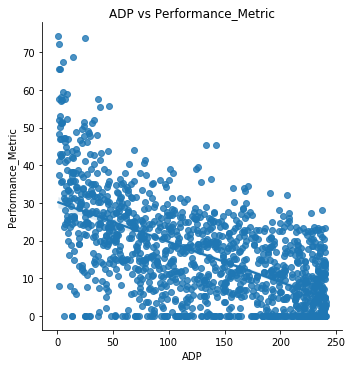

In [100]:
#Plots Performance Metric vs ADP
sns.lmplot(x='ADP',y='Performance_Metric',data=vet_performance_df)
plt.title('ADP vs Performance_Metric')

In [30]:
#Encodes positions to a numeric value. 0=QB,1=RB,2=TE,3=WR
from sklearn.preprocessing import LabelEncoder

vet_performance_df=performance_df[performance_df['Rookie']=='No']

encode=LabelEncoder()

vet_performance_df['Pos']=encode.fit_transform(vet_performance_df['Pos'])
vet_performance_df['Round']=encode.fit_transform(vet_performance_df['Round'])

vet_performance_df.shape







C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


(1321, 18)

In [28]:
vet_performance_df['Round'].value_counts()

0    348
1    279
2    217
7    171
3    126
4     80
5     75
6     25
Name: Round, dtype: int64

In [29]:
vet_performance_df['Pos'].value_counts()

3    552
1    400
2    195
0    174
Name: Pos, dtype: int64

In [60]:
#gets the columns I need to run the test and scales the data between 0 and 1
vet_df=vet_performance_df.loc[:,['Pos','AGE','Round','Fantasy Points','Performance_Metric']]

col_names=vet_df.columns

performance_target=vet_performance_df.loc[:,'ADP']

vet_df=min_max.fit_transform(vet_df)

vet_df=pd.DataFrame(vet_df,columns=col_names)

performance_target.shape

(1321,)

In [61]:
#Linear regression model
performance_train,performance_test,adp_train,adp_test=train_test_split(vet_df,performance_target, 
                                                                       test_size=.2,random_state=123)

lm.fit(performance_train,adp_train)
perform_predict=lm.predict(performance_test)



In [62]:
#Cross validation score
cross_val_score(lm,performance_train,adp_train,cv=10).mean()

0.49934485965309133

In [63]:
#R^2 score
print('R^2 Score:',lm.score(performance_train,adp_train))

R^2 Score: 0.5078847043308405


In [65]:
perform_vet_mse=mean_squared_error(adp_test,perform_predict)

print('Root Mean Error:',np.sqrt(perform_vet_mse))

Root Mean Error: 57.62680525657344


In [67]:
#Parameters for random search grid
params={'n_estimators':[25,50,75,100],
       'max_depth':[2,3,4,5]}

vet_rf=RandomForestRegressor()

perform_search=RandomizedSearchCV(vet_rf,param_distributions=params, cv=5,n_iter=16,scoring='neg_mean_squared_error',random_state=123)

In [68]:
perform_search.fit(performance_train,adp_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [70]:
#Cross validation score for Random Forest Regressor
cross_val_score(vet_rf,performance_train,adp_train,cv=10).mean()

0.5565340223825904

In [73]:
perform_search.best_params_

{'n_estimators': 25, 'max_depth': 5}

In [75]:
perform_search.best_score_

-2455.5473884918615

In [78]:
perform_predict=perform_search.best_estimator_.predict(performance_test)

In [80]:
from sklearn.metrics import r2_score

r2_score(adp_test,perform_predict)

0.4415589604711726

In [82]:
#Prints the mean squared error for random forsr
perform_rf_mse=mean_squared_error(adp_test,perform_predict)

print('Root Mean Squared Error Random Forest:',np.sqrt(perform_rf_mse))

Root Mean Squared Error Random Forest: 57.23197685242139


In [101]:
#Importance List
importances=list(perform_search.best_estimator_.feature_importances_)

importances

feature_importance=[(X,round(importances,2))for X,importances in zip(col_names, importances)]

feature_importance

[('Pos', 0.02),
 ('AGE', 0.17),
 ('Round', 0.06),
 ('Fantasy Points', 0.26),
 ('Performance_Metric', 0.49)]

In [212]:
#XGB Boost. Ignore the error I already convert the matrices to DMatrix. Python didn't like that I ran it again
import xgboost as xgb

performance_train=xgb.DMatrix(performance_train,label=adp_train)
performance_test=xgb.DMatrix(performance_test,label=adp_test)

params={
    'max_depth': 6,
    'eta':0.5,
    'objective':'reg:squarederror',
    'colsample_bytree':0.3,
    
}

TypeError: can not initialize DMatrix from DMatrix

In [234]:
#Parameters from XGBoost
params={
    'max_depth': 6,
    'eta':0.6,
    'objective':'reg:squarederror',
    'colsample_bytree':0.3,
    
}

In [235]:
#Trains and predicts XBG Boost model
xg_reg=xgb.train(params,performance_train)
perform_preds=xg_reg.predict(performance_test)

In [236]:
#Cross validation results
xgb.cv(dtrain=train, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,91.643298,0.221195,91.703667,0.620475
1,67.302616,5.345007,70.647708,2.868632
2,61.863934,7.615839,66.158784,3.733036
3,58.106567,9.285828,63.724477,4.690099
4,56.818657,9.413013,63.280994,4.605356
5,50.694361,3.859519,60.532599,1.440248
6,48.422485,4.249440,59.348280,1.092411
7,47.891829,4.648983,58.730279,1.507792
8,44.989749,2.610413,57.410990,0.127379
9,44.582848,2.564012,57.083945,0.251716


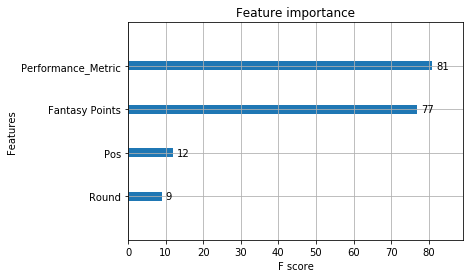

In [237]:
#Plots feature importance
xgb.plot_importance(xg_reg)
plt.show()

In [256]:
pd.DataFrame(list(zip(adp_test,perform_preds)),columns=['Actual ADP','XGB Boost ADP'])

,Actual ADP,XGB Boost ADP
0,55.50,171.662964
1,159.83,131.190079
2,49.50,109.970474
3,141.00,190.951340
4,16.83,110.990005
...,...,...
260,168.67,161.442841
261,20.00,144.219421
262,219.20,100.499748
263,56.17,148.670425


In [83]:
#Keras model with performance metric
def perform_model(n_neurons,optimizer,n_hidden=1,learning_rate=0.1,input_dim=5,activation='relu'):
    model=Sequential()
    optimizer=optimizer
    model.add(Dense(n_neurons,input_dim=input_dim,activation=activation))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
    return model
params_optimum={
    'n_hidden':[10,11,12,13,14,15],
    'n_neurons': [64,96,128,160,192,224,256],
    'learning_rate':[0.1,0.01,0.001],
    'epochs': [10,20,30,40,50,60,70,80,90,100],
    'optimizer':['Adam','SGD','Adagrad']
}

In [86]:
from keras.wrappers.scikit_learn import KerasRegressor
import random
#Random Grid Search using Kera's Classifier
random.seed(42)

keras_reg=KerasRegressor(build_fn=perform_model)

random_search=RandomizedSearchCV(keras_reg,params_optimum,cv=3)

perform_history=random_search.fit(performance_train,adp_train,validation_split=.2,verbose=0,
                 callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

352/352 [==============================] - 0s 82us/step


C:\Users\John\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:820: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


352/352 [==============================] - 0s 161us/step


In [88]:
perform_keras_predict=random_search.best_estimator_.predict(performance_test)

#Prints the mean squared error for Neural Network
keras_mse=mean_squared_error(adp_test,perform_keras_predict)

print('Root Mean Squared Error Neural Network:',np.sqrt(keras_mse))

Root Mean Squared Error Neural Network: 54.04307268534664


In [90]:
r2_score(adp_test,perform_keras_predict)

0.5020566929138258

In [107]:
#used only the most important features
new_vet_df=vet_performance_df.loc[:,['AGE','Fantasy Points','Performance_Metric']]

col_names=new_vet_df.columns

new_vet_df=pd.DataFrame(new_vet_df,columns=col_names)

perform_train,perform_test,adp_train,adp_test=train_test_split(new_vet_df,performance_target, 
                                                                       test_size=.2,random_state=123)


In [105]:
new_perform_search=RandomizedSearchCV(vet_rf,param_distributions=params, cv=5,n_iter=16,scoring='neg_mean_squared_error',random_state=123)

In [108]:
new_perform_search.fit(perform_train,adp_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [109]:
cross_val_score(vet_rf,perform_train,adp_train,cv=10).mean()

0.454957922823081

In [111]:
new_perform_predict=new_perform_search.best_estimator_.predict(perform_test)

In [113]:
r2_score(adp_test,new_perform_predict)

0.4308245004109593

In [115]:
#Prints the mean squared error for random forest
new_perform_rf_mse=mean_squared_error(adp_test,new_perform_predict)

print('Root Mean Squared Error Random Forest:',np.sqrt(new_perform_rf_mse))

Root Mean Squared Error Random Forest: 57.77942058934016


In [173]:
#XGB Boost using the most important features
import xgboost as xgb

train=xgb.DMatrix(perform_train,label=adp_train)
test=xgb.DMatrix(perform_test,label=adp_test)

params={
    'max_depth': 4,
    'eta':0.5,
    'objective':'reg:squarederror',
    'colsample_bytree':0.3,
    
}

In [174]:
xg_reg=xgb.train(params,train)

In [175]:
preds=xg_reg.predict(test)

In [176]:
cv_results = xgb.cv(dtrain=train, params=params, nfold=3,
                    num_boost_round=66,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,99.335739,0.193902,99.705403,0.753139
1,69.781505,0.467419,72.008573,0.523561
2,61.299330,2.499440,64.257875,2.212497
3,56.642816,3.200643,60.449594,1.258996
4,53.529414,1.631846,58.363797,0.552521
5,51.983368,1.485145,57.737371,0.584479
6,50.395102,1.051031,57.305065,0.580773
7,49.874724,1.075959,57.218935,0.570515
8,49.170713,1.045067,57.131393,0.223259
9,48.553228,0.878615,57.064702,0.289183


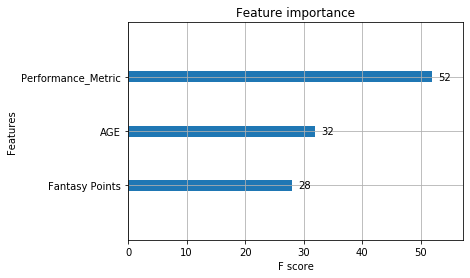

In [177]:
xgb.plot_importance(xg_reg)
plt.show()

In [178]:
r2_score(adp_test,preds)

0.4386502448274284

In [202]:
from sklearn.model_selection import GridSearchCV

xg_reg=xgb.XGBRegressor()

param_grid={
    'n_estimators':[3,10,30],
    'max_depth':[3,4,5],
    'eta':[.1,.3,.5],
   
}

grid_search=GridSearchCV(xg_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)


In [203]:
grid_search.fit(perform_train,adp_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=Non

In [204]:
cvresults=grid_search.cv_results_

for mean_score,params in zip(cvresults['mean_test_score'],cvresults['params']):
    print((np.sqrt(-mean_score),params))

(116.58559044143726, {'eta': 0.1, 'max_depth': 3, 'n_estimators': 3})
(73.3554389800461, {'eta': 0.1, 'max_depth': 3, 'n_estimators': 10})
(53.37919875348251, {'eta': 0.1, 'max_depth': 3, 'n_estimators': 30})
(116.5217035840844, {'eta': 0.1, 'max_depth': 4, 'n_estimators': 3})
(73.1764969676662, {'eta': 0.1, 'max_depth': 4, 'n_estimators': 10})
(53.280427711647064, {'eta': 0.1, 'max_depth': 4, 'n_estimators': 30})
(116.48148519112513, {'eta': 0.1, 'max_depth': 5, 'n_estimators': 3})
(73.25991468568797, {'eta': 0.1, 'max_depth': 5, 'n_estimators': 10})
(53.648754565353016, {'eta': 0.1, 'max_depth': 5, 'n_estimators': 30})
(72.89252130457072, {'eta': 0.3, 'max_depth': 3, 'n_estimators': 3})
(53.19118334023798, {'eta': 0.3, 'max_depth': 3, 'n_estimators': 10})
(53.26811912022277, {'eta': 0.3, 'max_depth': 3, 'n_estimators': 30})
(73.16873892561772, {'eta': 0.3, 'max_depth': 4, 'n_estimators': 3})
(53.219733503826895, {'eta': 0.3, 'max_depth': 4, 'n_estimators': 10})
(54.35011380049295, {'